In [1]:

import mechanicalsoup
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

driver = webdriver.Chrome("/opt/anaconda3/bin/chromedriver 2") #path to webdriver
driver.get('https://kenpom.com/index.php')


driver.find_element_by_xpath('/html/body/div/div[1]/div[1]/div[1]/form')
e = driver.find_element_by_xpath('/html/body/div/div[1]/div[1]/div[1]/form/input[1]')
print(e)
e.send_keys("username") #kenpom username
e = driver.find_element_by_xpath('/html/body/div/div[1]/div[1]/div[1]/form/input[2]')
e.send_keys("password")#kenpom password
e = driver.find_element_by_xpath('/html/body/div/div[1]/div[1]/div[1]/form/input[3]')
e.click()

b = driver.find_element_by_xpath('/html/body/div/div[1]/div[1]/div[2]/nav/ul/li[2]/a')
print(b)
b.click()


headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}
url = "https://kenpom.com/fanmatch.php"

r=requests.get(url,headers=headers)
soup = BeautifulSoup(r.content, "html.parser")
list_category_elements = driver.find_element_by_xpath('/html/body/div/div[1]/div[3]/table') #finds table elements and prints as text
links = list_category_elements.find_elements(By.TAG_NAME,"td")
links_values=[]
for i in range(len(links)):
   
    links_values.append(links[i].text)
df=pd.DataFrame((links_values),columns=['team'])
print(df)

links_values=np.array(links_values)



                           


<selenium.webdriver.remote.webelement.WebElement (session="9818bd51b8a0f5b899f5591cc40b45c7", element="4ae50513-5672-4c7c-ba99-8dd699be1afe")>
<selenium.webdriver.remote.webelement.WebElement (session="9818bd51b8a0f5b899f5591cc40b45c7", element="ffc7677b-3e7b-4b7d-93fc-16f06f6e2e6a")>
                              team
0     21 Minnesota at\n10 Michigan
1             Michigan 78-73 (68%)
2       8:30 pm\n Big Ten Network 
3    Ann Arbor, MI\nCrisler Center
4                          72.6\n1
..                             ...
198                        8:00 pm
199   Houston, TX\nSharp Gymnasium
200                       13.0\n29
201                            \n 
202                            \n 

[203 rows x 1 columns]


In [2]:
#creates kenpom df and names columns
df2=pd.DataFrame(df.team.str.rsplit(' ',n=2,expand=True)) 



df3=df2.iloc[1::7,:2]
df=df.iloc[0::7,:2]

df3.columns=['team','score']
df4=pd.DataFrame(df3.score.str.rsplit('-',n=2,expand=True))
df4.columns=['score1','score2']

Kenpom=pd.concat([df3['team'], df4.reindex(df3.index)], axis=1).iloc[0:100]





In [3]:
driver.get('https://haslametrics.com/ratings.php')
list_category_elements = driver.find_element_by_xpath('/html/body/div/table/tbody/tr[5]/td/div[3]/div/div/table') #finds hasla table elements
links = list_category_elements.find_elements(By.CLASS_NAME,"scoreproj1")
links2= list_category_elements.find_elements(By.CLASS_NAME,"scoreproj2")
links_values2=[]
links2_values2=[]
for i in range(len(links)):
    
     
    links_values2.append(links[i].text)
for i in range(len(links2)):
    
   
    links2_values2.append(links2[i].text)


dfh1=pd.DataFrame(links_values2)
dfh2=pd.DataFrame(links2_values2)
links_values2=np.array(links_values2)
links2_values2=np.array(links2_values2)


    

In [4]:
dfh4=pd.DataFrame((links_values2[0::2]),columns=['Home']) #creates hasla df
dfh3=pd.DataFrame((links_values2[1::2]),columns=['HScore'])

Hasla=pd.concat([dfh4, dfh3.reindex(dfh4.index)], axis=1).iloc[0:50]


In [5]:
dfh5=pd.DataFrame((links2_values2[0::2]),columns=['Away'])
dfh6=pd.DataFrame((links2_values2[1::2]),columns=['Ascore'])

Hasla2=pd.concat([dfh5, dfh6.reindex(dfh5.index)], axis=1).iloc[0:50]


In [6]:
Halsa=Hasla

In [7]:
Hasla2=Hasla2

In [8]:
driver.get('https://barttorvik.com/schedule.php')
list_category_elements = driver.find_element_by_xpath('/html/body/div/div/p[4]/table/tbody') #finds torvik table elements
links = list_category_elements.find_elements(By.TAG_NAME,'a')
links_values3=[]
for i in range(len(links)):
    
    links_values3.append(links[i].text)
    
    

dft=pd.DataFrame(links_values3)

dft=pd.DataFrame(np.array((links_values3)),
                         columns=['team1'])


links_values3=np.array(links_values3)

print(dft.iloc[0:20])


                          team1
0                     Minnesota
1                      Michigan
2    Michigan -6.3\n79-72 (72%)
3                              
4                    Seton Hall
5                     Creighton
6   Creighton -5.6\n77-71 (70%)
7                              
8                      Arkansas
9                     Tennessee
10  Tennessee -7.2\n73-66 (77%)
11                             
12                 Rhode Island
13                     Richmond
14   Richmond -3.7\n75-71 (64%)
15                             
16                     Oklahoma
17                       Baylor
18    Baylor -12.6\n83-70 (87%)
19                             


In [9]:
#creates torvik df
dft2=dft.team1.str.split(expand=True)

dft2=pd.DataFrame(dft.team1.str.split('\n',1).tolist(), 
                         columns = ['Teams','PredictedScore'])

Tovrik=dft2.iloc[2::4]
Tovrik.columns=['score1','score2']





In [10]:
TovrikF=pd.DataFrame(Tovrik.score2.str.rsplit('-',n=2,expand=True))
TovrikF.columns=['score1','score2']



In [11]:
TovrikFinal2=pd.DataFrame(TovrikF.score2.str.rsplit('(',n=2,expand=True))


In [12]:
Tovrikcombo=pd.concat([Tovrik, TovrikF.reindex(Tovrik.index)], axis=1).iloc[0:50]
TovrikFinal2=pd.DataFrame(TovrikF.score2.str.rsplit('(',n=2,expand=True))
Tovrikx=pd.concat([Tovrikcombo, TovrikFinal2.reindex(Tovrikcombo.index)], axis=1).iloc[0:50]
Tovrikx.columns=['Team','Pred','Score1','-','Score2','-']



TovFinal=Tovrikx
TovFinal.drop(TovFinal.columns[[1,3,5]], axis=1, inplace=True)




In [13]:

driver.get('https://il.sportsbook.fanduel.com/sports/navigation/11086.3/11087.3') #finds fanduel table elements 
b=driver.find_element_by_class_name("btn.tab.active") #sends fanduel to 'all games' tab - may need tweaking if featured games tab present
print(b)
b.click()
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}



url = "https://il.sportsbook.fanduel.com/sports/navigation/11086.3/11087.3"

r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.content, "html.parser")
list_category_elements = driver.find_element_by_xpath('/html/body/div[1]/div/div/div[6]/main/div/div/div/div/div[1]/div[3]/div[2]/div/div/div/div[3]/div/div/div/div/div[2]')
linksspread = list_category_elements.find_elements(By.CLASS_NAME,"event")

links_valuesFD=[]
for i in range(len(linksspread)):
   
    links_valuesFD.append(linksspread[i].text)

dffd=pd.DataFrame((links_valuesFD[0::]),columns=['Fanduel']) #fanduel df


<selenium.webdriver.remote.webelement.WebElement (session="9818bd51b8a0f5b899f5591cc40b45c7", element="3f2d76db-dfbb-4847-a593-7b59c6592991")>


In [14]:
dffd=pd.DataFrame((links_valuesFD),columns=['Fanduel'])
dffd.set_index('Fanduel')

dffd3=pd.DataFrame(dffd.Fanduel.str.rsplit('\n',n=25,expand=True))

Fanduel=dffd3


<AxesSubplot:>

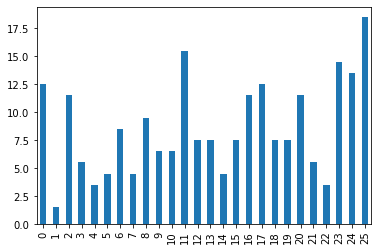

In [15]:
import matplotlib.pyplot as plt
Fanduel[2]=pd.to_numeric(Fanduel[2])
Fanduel[2]=np.abs(Fanduel[2])
Fanduel[9]=pd.to_numeric(Fanduel[9])

plt.figure();

Fanduel[2].plot(kind='bar') #fanduel bar graph of spreads by column

In [16]:

Fanduel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,St Josephs,St. Bonaventure,12.5,-115,-12.5,-105,+700,-1100,O,152.5,-108,U,152.5,-112,Today 3:00PM,MORE WAGERS
1,Tulsa,South Florida,1.5,-120,-1.5,-102,-102,-116,O,127.5,-106,U,127.5,-114,Today 3:00PM,MORE WAGERS
2,Pittsburgh,Syracuse,11.5,-112,-11.5,-108,+590,-850,O,139.5,-110,U,139.5,-110,Today 3:30PM,MORE WAGERS
3,Massachusetts,George Washington,5.5,-104,+5.5,-118,-230,+190,O,152.5,-106,U,152.5,-114,Today 5:00PM,MORE WAGERS
4,Rhode Island,Richmond,3.5,-104,-3.5,-118,+156,-186,O,144.5,-105,U,144.5,-115,Today 5:00PM,MORE WAGERS
5,Virginia Tech,Louisville,4.5,-114,-4.5,-106,+166,-198,O,131.5,-110,U,131.5,-110,Today 5:30PM,MORE WAGERS
6,Arkansas,Tennessee,8.5,-118,-8.5,-104,+310,-400,O,141.5,-110,U,141.5,-110,Today 6:00PM,MORE WAGERS
7,Georgetown,Butler,4.5,-112,-4.5,-108,+168,-200,O,140.5,-114,U,140.5,-105,Today 6:00PM,MORE WAGERS
8,Georgia,LSU,9.5,-104,-9.5,-118,+440,-590,O,155.5,-114,U,155.5,-106,Today 6:00PM,MORE WAGERS
9,Samford,Chattanooga,6.5,-104,-6.5,-118,+260,-320,O,154.5,-108,U,154.5,-112,Today 6:00PM,MORE WAGERS


In [17]:
Kenpom['score1']=pd.to_numeric(Kenpom['score1'])
Kenpom['score2']=pd.to_numeric(Kenpom['score2'])
Kenpom["Kspread"]=np.abs((Kenpom['score2']-Kenpom['score1']))




[Text(1, 0, 'Michigan'),
 Text(8, 0, 'Creighton'),
 Text(15, 0, 'Louisville'),
 Text(22, 0, 'Tennessee'),
 Text(29, 0, 'Richmond'),
 Text(36, 0, 'Mississippi'),
 Text(43, 0, 'South Carolina'),
 Text(50, 0, 'South Florida'),
 Text(57, 0, 'Baylor'),
 Text(64, 0, 'Xavier'),
 Text(71, 0, 'Syracuse'),
 Text(78, 0, 'Syracuse'),
 Text(85, 0, 'Butler'),
 Text(92, 0, 'LSU'),
 Text(99, 0, 'VCU'),
 Text(106, 0, 'Wofford'),
 Text(113, 0, 'Houston'),
 Text(120, 0, 'Massachusetts'),
 Text(127, 0, 'Duke'),
 Text(134, 0, 'Virginia'),
 Text(141, 0, 'Sam Houston St.'),
 Text(148, 0, 'St. Bonaventure'),
 Text(155, 0, 'Chattanooga'),
 Text(162, 0, 'Nicholls St.'),
 Text(169, 0, 'Central Arkansas'),
 Text(176, 0, 'Utah St.'),
 Text(183, 0, 'Northwestern St.'),
 Text(190, 0, 'Boise St.'),
 Text(197, 0, 'Abilene Christian')]

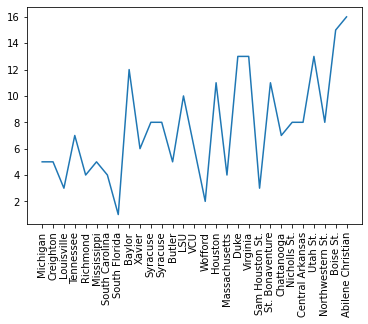

In [18]:
import matplotlib.pyplot as plt
Kenpom['Kspread']=pd.to_numeric(Kenpom['Kspread']) 

kenvis= pd.DataFrame(Kenpom['Kspread'])

plt.figure();
ax = kenvis.Kspread.plot(xticks=Kenpom.index, rot=90)
ax.set_xticklabels(Kenpom.team)
#kenpom plot of spreads by team

In [19]:
Kenpom.sort_values('Kspread')

,team,score1,score2,Kspread
50,South Florida,63,62,1
106,Wofford,71,69,2
15,Louisville,67,64,3
141,Sam Houston St.,75,72,3
29,Richmond,75,71,4
43,South Carolina,71,67,4
120,Massachusetts,80,76,4
1,Michigan,78,73,5
8,Creighton,77,72,5
36,Mississippi,72,67,5


In [20]:
Hasla2=pd.concat([dfh5, dfh6], axis=1).iloc[0:50]
HaslaF=pd.concat([Hasla, Hasla2], axis=1).iloc[0:25]



[Text(0, 0, 'Baylor 1'),
 Text(1, 0, 'Michigan 5'),
 Text(2, 0, 'Tennessee 6'),
 Text(3, 0, 'Creighton 14'),
 Text(4, 0, 'Virginia 15'),
 Text(5, 0, 'LSU 16'),
 Text(6, 0, 'Houston 18'),
 Text(7, 0, 'Syracuse 20'),
 Text(8, 0, 'Duke 34'),
 Text(9, 0, 'Xavier 37'),
 Text(10, 0, 'Louisville 41'),
 Text(11, 0, 'VCU 40'),
 Text(12, 0, 'Ole Miss 49'),
 Text(13, 0, 'Richmond 61'),
 Text(14, 0, 'Utah State 67'),
 Text(15, 0, 'Boise State 68'),
 Text(16, 0, 'South Carolina 77'),
 Text(17, 0, 'St. Bonaventure 84'),
 Text(18, 0, 'USF 106'),
 Text(19, 0, 'Butler 102'),
 Text(20, 0, 'UMass 111'),
 Text(21, 0, 'Abil. Christian 116'),
 Text(22, 0, 'Wofford 122'),
 Text(23, 0, 'Chattanooga 183'),
 Text(24, 0, 'Cent. Arkansas 207')]

<Figure size 432x288 with 0 Axes>

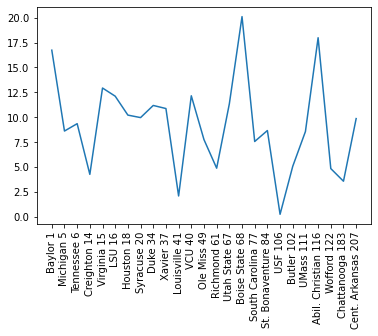

In [21]:
import matplotlib.pyplot as plt
HaslaF['HScore']=pd.to_numeric(HaslaF['HScore'])
HaslaF['Ascore']=pd.to_numeric(HaslaF['Ascore'])
HaslaF["Hspread"]=np.abs((HaslaF['HScore']-HaslaF['Ascore']))
HaslaF['Hspread']
HaslaF['Hspread']=pd.to_numeric(HaslaF['Hspread'])
Hvis= pd.DataFrame(HaslaF['Hspread'])

plt.figure();
plt.figure();
ax = Hvis.Hspread.plot(xticks=HaslaF.index, rot=90)
ax.set_xticklabels(HaslaF.Home)
#hasla plot of spreads by team

In [22]:
HaslaF.sort_values('Hspread')

,Home,HScore,Away,Ascore,Hspread
18,USF 106,63.65,Tulsa 85,63.40,0.25
10,Louisville 41,68.74,Virginia Tech 38,66.65,2.09
23,Chattanooga 183,77.23,Samford 197,73.66,3.57
3,Creighton 14,77.06,Seton Hall 19,72.80,4.26
22,Wofford 122,70.29,UNCG 164,65.45,4.84
13,Richmond 61,74.65,URI 93,69.77,4.88
19,Butler 102,71.10,Georgetown 127,66.03,5.07
16,South Carolina 77,73.44,Texas A&M 129,65.88,7.56
12,Ole Miss 49,74.15,Auburn 96,66.40,7.75
20,UMass 111,81.43,G. Washington 283,72.87,8.56


[Text(2, 0, 'Michigan -6.3'),
 Text(6, 0, 'Creighton -5.6'),
 Text(10, 0, 'Tennessee -7.2'),
 Text(14, 0, 'Richmond -3.7'),
 Text(18, 0, 'Baylor -12.6'),
 Text(22, 0, 'Louisville -4.1'),
 Text(26, 0, 'South Florida -1.5'),
 Text(30, 0, 'Syracuse -8.3'),
 Text(34, 0, 'Xavier -8.3'),
 Text(38, 0, 'Butler -2.8'),
 Text(42, 0, 'LSU -9.7'),
 Text(46, 0, 'South Carolina -4.7'),
 Text(50, 0, 'Mississippi -7.7'),
 Text(54, 0, 'VCU -6.2'),
 Text(58, 0, 'Houston -10.1'),
 Text(62, 0, 'Wofford -2.0'),
 Text(66, 0, 'Massachusetts -3.3'),
 Text(70, 0, 'Duke -12.1'),
 Text(74, 0, 'St. Bonaventure -10.5'),
 Text(78, 0, 'Chattanooga -5.7'),
 Text(82, 0, 'Sam Houston St. -1.3'),
 Text(86, 0, 'Virginia -12.9'),
 Text(90, 0, 'Utah St. -10.2'),
 Text(94, 0, 'Northwestern St. -4.6'),
 Text(98, 0, 'Nicholls St. -6.8'),
 Text(102, 0, 'Central Arkansas -9.3'),
 Text(106, 0, 'Boise St. -17.5'),
 Text(110, 0, 'Abilene Christian -17.1')]

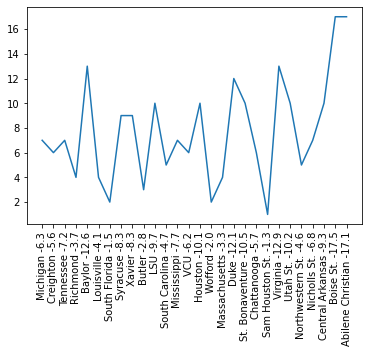

In [23]:
import matplotlib.pyplot as plt

TovFinal['Score1']=pd.to_numeric(TovFinal['Score1'])
TovFinal['Score2']=pd.to_numeric(TovFinal['Score2'])
TovFinal["Tspread"]=np.abs((TovFinal['Score2']-TovFinal['Score1']))
TovFinal['Tspread']=pd.to_numeric(TovFinal['Tspread'])

Torvis= pd.DataFrame(TovFinal['Tspread'])
plt.figure();
ax = Torvis.Tspread.plot(xticks=TovFinal.index, rot=90)
ax.set_xticklabels(TovFinal.Team)

#torvis plot of spreads by team

In [24]:

TovFinal.sort_values('Tspread')

,Team,Score1,Score2,Tspread
82,Sam Houston St. -1.3,73,72,1
26,South Florida -1.5,63,61,2
62,Wofford -2.0,69,67,2
38,Butler -2.8,71,68,3
14,Richmond -3.7,75,71,4
22,Louisville -4.1,68,64,4
66,Massachusetts -3.3,82,78,4
94,Northwestern St. -4.6,78,73,5
46,South Carolina -4.7,71,66,5
54,VCU -6.2,71,65,6


<AxesSubplot:>

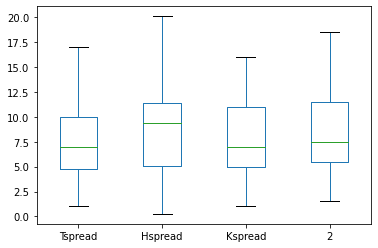

In [25]:
frame=[Torvis,Hvis,kenvis,Fanduel[2]]
frames=pd.concat(frame, axis=1)
frames.plot.box()
#avg spreads by site 2=fanduel 

<AxesSubplot:ylabel='Frequency'>

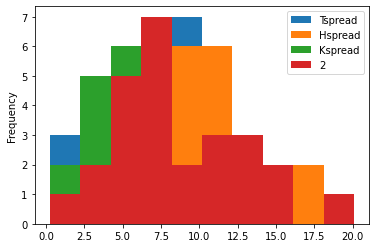

In [26]:
frames.plot.hist() #frequency of predicted spreads per site

<AxesSubplot:ylabel='Density'>

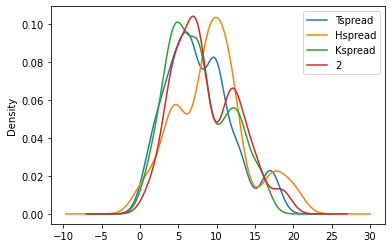

In [27]:
frames.plot.kde(bw_method=0.3) #density of predicted spreads per site

In [28]:
TovFinal["TTotal"]=np.abs((TovFinal['Score2']+TovFinal['Score1']))

HaslaF["HTotal"]=np.abs((HaslaF['HScore']+HaslaF['Ascore']))

Kenpom["KTotal"]=np.abs((Kenpom['score2']+Kenpom['score1']))

<AxesSubplot:ylabel='Density'>

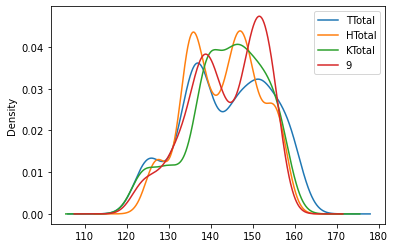

In [29]:
TTvis=pd.DataFrame(TovFinal["TTotal"])
HTvis=pd.DataFrame(HaslaF['HTotal'])
KTvis=pd.DataFrame(Kenpom["KTotal"])
FDTotal=pd.DataFrame(Fanduel[9])
Tframes=[TTvis,HTvis,KTvis,FDTotal]
Tframe=pd.concat(Tframes, axis=1)
Tframe.plot.kde(bw_method=0.3)
#density of predicted totals per site 9=fanduel

<AxesSubplot:ylabel='Frequency'>

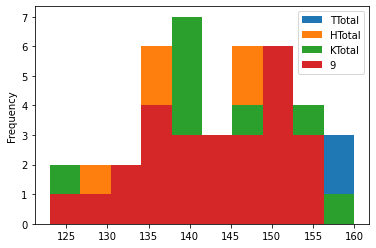

In [30]:
Tframe.plot.hist() #frequency of predicted total per site

<AxesSubplot:>

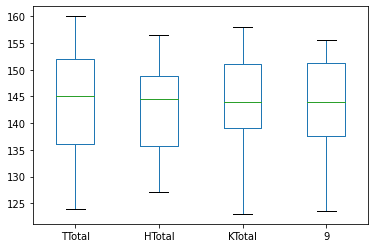

In [31]:
Tframe.plot.box() #avg predicted total per site

In [32]:
TovFinal.sort_values('TTotal') #final tables with totals

,Team,Score1,Score2,Tspread,TTotal
26,South Florida -1.5,63,61,2,124
86,Virginia -12.9,69,56,13,125
106,Boise St. -17.5,72,55,17,127
22,Louisville -4.1,68,64,4,132
58,Houston -10.1,72,62,10,134
54,VCU -6.2,71,65,6,136
90,Utah St. -10.2,73,63,10,136
62,Wofford -2.0,69,67,2,136
46,South Carolina -4.7,71,66,5,137
50,Mississippi -7.7,72,65,7,137


In [33]:
HaslaF.sort_values('HTotal')

,Home,HScore,Away,Ascore,Hspread,HTotal
18,USF 106,63.65,Tulsa 85,63.40,0.25,127.05
4,Virginia 15,70.05,Wake Forest 105,57.12,12.93,127.17
15,Boise State 68,76.68,Air Force 317,56.58,20.10,133.26
7,Syracuse 20,72.49,Pittsburgh 76,62.53,9.96,135.02
11,VCU 40,73.61,George Mason 185,61.46,12.15,135.07
10,Louisville 41,68.74,Virginia Tech 38,66.65,2.09,135.39
22,Wofford 122,70.29,UNCG 164,65.45,4.84,135.74
6,Houston 18,73.07,Wichita State 74,62.86,10.21,135.93
19,Butler 102,71.10,Georgetown 127,66.03,5.07,137.13
16,South Carolina 77,73.44,Texas A&M 129,65.88,7.56,139.32


In [34]:
Kenpom.sort_values('KTotal')

,team,score1,score2,Kspread,KTotal
134,Virginia,68,55,13,123
50,South Florida,63,62,1,125
190,Boise St.,72,57,15,129
15,Louisville,67,64,3,131
113,Houston,73,62,11,135
99,VCU,72,66,6,138
43,South Carolina,71,67,4,138
176,Utah St.,76,63,13,139
36,Mississippi,72,67,5,139
106,Wofford,71,69,2,140
